# About the Dataset

This data originally came from Crowdflower's Data for Everyone library.

As the original source says,

```
A sentiment analysis job about the problems of each major U.S. airline.
Twitter data was scraped from February of 2015 and contributors were asked to first classify
positive, negative, and neutral tweets, followed by categorizing negative reasons
(such as "late flight" or "rude service").
```

The data we're providing on Kaggle is a slightly reformatted version of the original source. It includes both a CSV file and SQLite database. The code that does these transformations is available on GitHub

For example, it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines:

## Refrence:

1.   https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c
2.   https://towardsdatascience.com/text-classification-with-state-of-the-art-nlp-library-flair-b541d7add21f
3.   https://www.lexalytics.com/technology/sentiment-analysis/#rules
4.   https://www.iflexion.com/blog/sentiment-analysis-python
5.   https://app.monkeylearn.com/main/classifiers/cl_pi3C7JiL/tab/api/

# Library and Function Needed

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # if u want to learn regex [https://regex101.com/]
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
import nltk # Natural Language Toolkit - Library for natural language processing (NLP) tasks such as tokenization, stemming, tagging, parsing, and more.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm # A Fast, Extensible Progress Bar - Library for creating progress bars to monitor the progress of iterations or tasks.
import os
import nltk
import spacy
import random # Random number generators - Library for generating random numbers, selecting random elements, shuffling sequences, etc.

from collections import Counter

import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, # Long Short-Term Memory (LSTM) layer - A type of recurrent neural network (RNN) layer capable of learning long-term dependencies.
                          Embedding, # Embedding layer - A layer for learning word embeddings from input text data.
                          BatchNormalization, # Batch Normalization layer - A layer that normalizes the activations of the previous layer at each batch.
                          Dense,
                          TimeDistributed,
                          Dropout, # A layer for preventing overfitting by randomly setting a fraction of input units to zero.
                          Bidirectional,
                          Flatten,
                          GlobalMaxPool1D) # Performs max pooling operation over the temporal dimension.

from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import (
    precision_score, # Precision score - Metric for evaluating classification models, measuring the ratio of correctly predicted positive observations to the total predicted positives.
    recall_score, # Recall score - Metric for evaluating classification models, measuring the ratio of correctly predicted positive observations to the total actual positives.
    f1_score, # F1 score - Harmonic mean of precision and recall, a metric for evaluating classification models.
    classification_report, # Classification report - Summary of the precision, recall, F1 score, and support for each class in a classification problem.
    accuracy_score # Accuracy score - Metric for evaluating classification models, measuring the proportion of correct predictions to the total number of predictions.
)

In [3]:
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_row", None)


def check_duplicates(dataframe):
    """
    Memeriksa nilai duplikat dari DataFrame.
    """
    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated()]
    print(f"Jumlah Duplikat data: {duplicate_values.shape[0]}")
    display(duplicate_values.head(10))

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def basic_data_info(dataframe):
    """
    Menampilkan informasi dasar dari DataFrame.
    """
    # Menampilkan lima baris pertama DataFrame
    print("Preview Data:")
    print("---------------------------")
    display(dataframe.head())

    # Menampilkan info umum DataFrame
    print("\nInformasi Umum:")
    print("---------------------------")
    print(dataframe.info())

    # Menampilkan statistik deskriptif
    print("\nStatistik Deskriptif:")
    print("---------------------------")
    display(dataframe.describe())

# Simple of Sentiment Analysis with library

**`Flair | NTLK Vader | Text Blob`**

### Flair

In [4]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

example_sentence = "I really like you but sometimes you can be so stupid and mean. but for me it's still good"

In [5]:
!pip install flair

In [6]:
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2024-04-18 23:43:40,299 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpd_bvb_l7


100%|██████████| 253M/253M [00:12<00:00, 21.2MB/s]

2024-04-18 23:43:53,280 copying /tmp/tmpd_bvb_l7 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-04-18 23:43:54,445 removing temp file /tmp/tmpd_bvb_l7


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [7]:
s = flair.data.Sentence(example_sentence)

In [8]:
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

['Sentence[21]: "I really like you but sometimes you can be so stupid and mean. but for me it's still good"'/'POSITIVE' (0.9814)]

### NLTK Vader

In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [10]:
sid.polarity_scores(example_sentence)

{'neg': 0.226, 'neu': 0.56, 'pos': 0.214, 'compound': -0.3188}

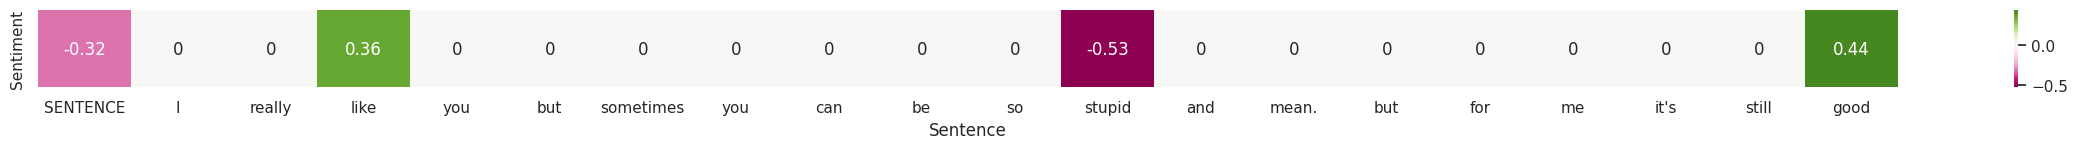

In [11]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + example_sentence.split(),
    "Sentiment":[sid.polarity_scores(example_sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in example_sentence.split()]
})

### TextBlob

In [12]:
from textblob import TextBlob

In [13]:
TextBlob(example_sentence).sentiment

Sentiment(polarity=-0.05312499999999998, subjectivity=0.621875)

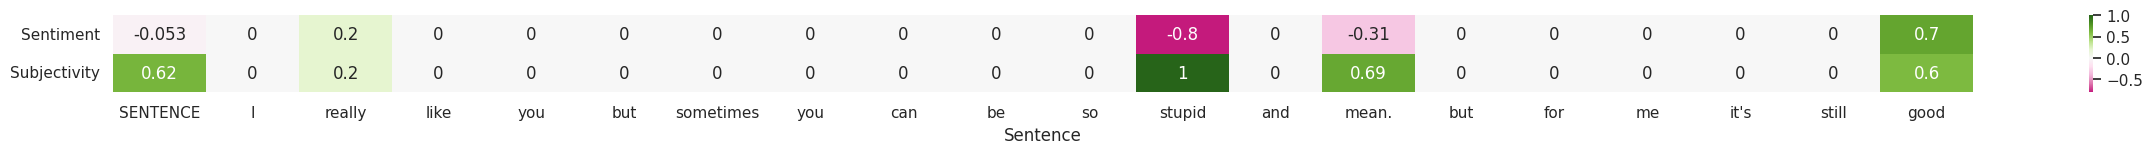

In [14]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + example_sentence.split(),
      "Sentiment":[TextBlob(example_sentence).polarity] + [TextBlob(word).polarity for word in example_sentence.split()],
      "Subjectivity":[TextBlob(example_sentence).subjectivity] + [TextBlob(word).subjectivity for word in example_sentence.split()],
})

# Read Dataset

kaggle datasets download -d crowdflower/twitter-airline-sentiment

In [15]:
mainPath = "/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Natural Language Preprocessing/Final Project [Natural Languange Processing (NLP) dengan Deep Learning]"

In [16]:
df = pd.read_csv(mainPath + "/Data/Tweets.csv")

# Explore Dataset

In [17]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 4

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

<ipython-input-18-4c0426baf78a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette=colors_airline)  # Menggunakan warna yang sudah ditentukan
<ipython-input-18-4c0426baf78a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col], palette=colors_sentiment)  # Menggunakan warna yang sudah ditentukan


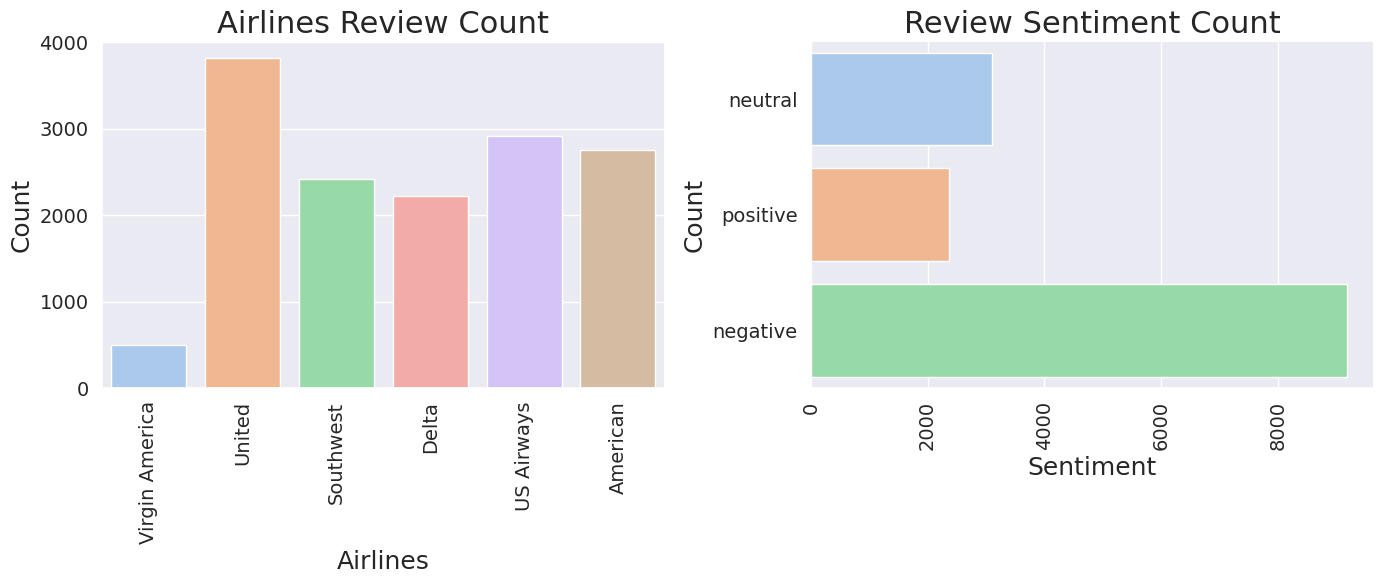

In [18]:
# Membuat warna untuk setiap kategori
colors_airline = sns.color_palette("pastel", len(df["airline"].unique()))
colors_sentiment = sns.color_palette("pastel", len(df["airline_sentiment"].unique()))

plt.figure(figsize=(14, 6))

plt.subplot(121)
col = "airline"
xlabel = "Airlines"
ylabel = "Count"

sns.countplot(x=df[col], palette=colors_airline)  # Menggunakan warna yang sudah ditentukan
plt.title("Airlines Review Count")
plt.xticks(rotation=90)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.subplot(122)
col = "airline_sentiment"
xlabel = "Sentiment"
ylabel = "Count"
sns.countplot(df[col], palette=colors_sentiment)  # Menggunakan warna yang sudah ditentukan
plt.title("Review Sentiment Count")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

[]

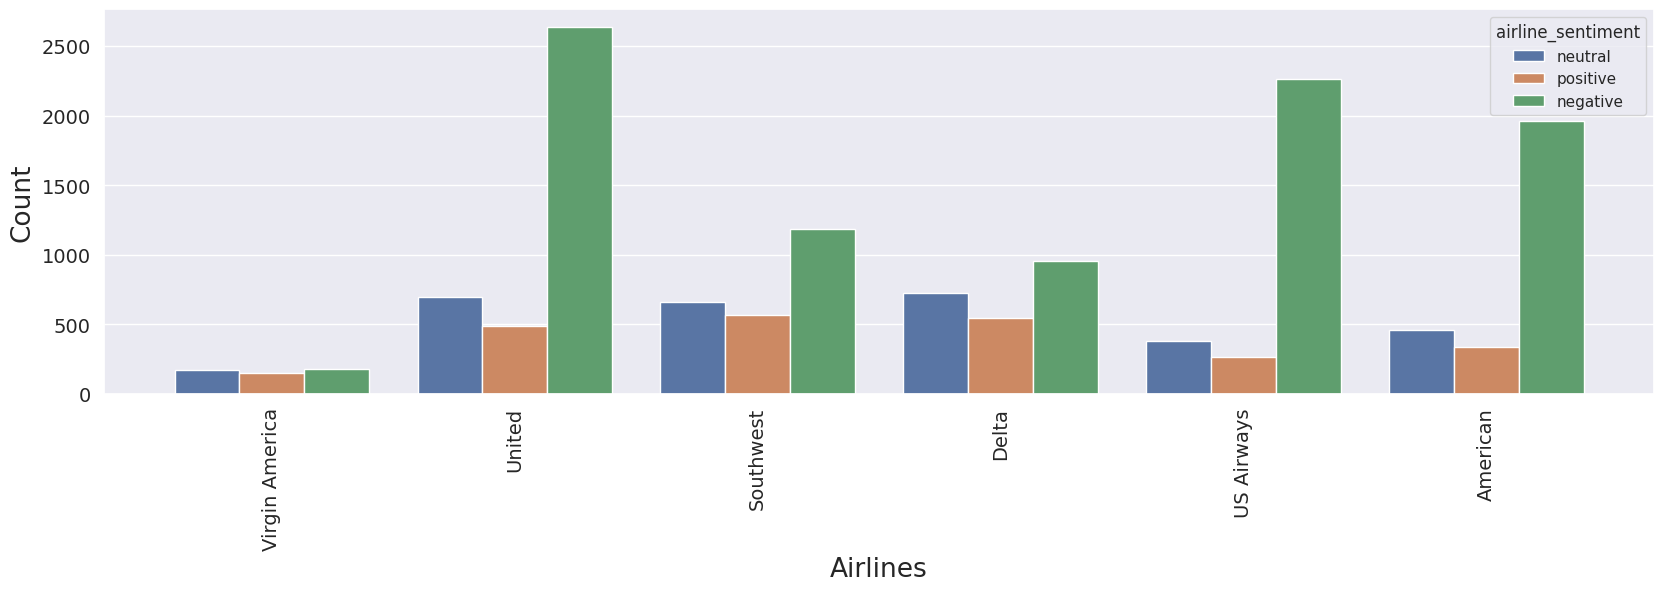

In [19]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Airlines"
ylabel = "Count"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

plt.figure(figsize=figsize)
col1 = "airline"
col2 = "airline_sentiment"
sns.countplot(x=df[col1], hue=df[col2])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

In [20]:
check_duplicates(df)

Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 36


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12059,570305051819941889,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
12063,570303383782989824,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
12066,570301929580048385,neutral,1.0,NaN,NaN,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2015-02-24 11:19:10 -0800,"Cincinnati, Ohio",Atlantic Time (Canada)
12068,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
12069,570300915418320897,negative,1.0,Cancelled Flight,1.0,American,NaN,LancasterPattie,NaN,0,@AmericanAir You are jumping the gun and Cance...,NaN,2015-02-24 11:15:08 -0800,NaN,NaN
12074,570299252141903873,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir This is exactly why ill be flying...,NaN,2015-02-24 11:08:32 -0800,Virginia,Eastern Time (US & Canada)
12075,570298770136674304,negative,1.0,Customer Service Issue,1.0,American,NaN,law_econ,NaN,0,@AmericanAir This doesn't address my issue. I ...,NaN,2015-02-24 11:06:37 -0800,"Newport Beach, CA",Central Time (US & Canada)
12078,570298644475346945,negative,1.0,Customer Service Issue,1.0,American,NaN,denismishin,NaN,0,@AmericanAir submitted a case to AA customer r...,NaN,2015-02-24 11:06:07 -0800,"Bellevue, WA",Eastern Time (US & Canada)
12079,570298371140939776,negative,1.0,Late Flight,1.0,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2015-02-24 11:05:01 -0800,"Las Vegas, NV",Pacific Time (US & Canada)


In [21]:
missing_data(df)

,Total,Percent
negativereason_gold,14608,99.781421
airline_sentiment_gold,14600,99.726776
tweet_coord,13621,93.039617
negativereason,5462,37.308743
user_timezone,4820,32.923497
tweet_location,4733,32.329235
negativereason_confidence,4118,28.128415
tweet_id,0,0.000000
airline_sentiment,0,0.000000
airline_sentiment_confidence,0,0.000000


In [22]:
basic_data_info(df)

Preview Data:
---------------------------


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)



Informasi Umum:
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created  

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [23]:
from plotly.subplots import make_subplots
from plotly.offline import iplot

neg = df[df['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
pos = df[df['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
neu = df[df['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))

fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Histogram(x=list(neg), name='Negative Tweets'),
    row=1,
    col=1
)

fig.add_trace(
    go.Histogram(x=list(pos), name='Positive Tweets'),
    row=1,
    col=2,
)

fig.add_trace(
    go.Histogram(x=list(neu), name='Neutral Tweets'),
    row=1,
    col=3,
)

fig.update_layout(height=500, width=850, title_text="Word Count")
iplot(fig)

In [24]:
neg = df[df['airline_sentiment']=='negative']['text'].str.len()
pos = df[df['airline_sentiment']=='positive']['text'].str.len()
neu = df[df['airline_sentiment']=='neutral']['text'].str.len()

fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Histogram(x=list(neg), name='Negative Tweets'),
    row=1,
    col=1
)

fig.add_trace(
    go.Histogram(x=list(pos), name='Positive Tweets'),
    row=1,
    col=2,
)

fig.add_trace(
    go.Histogram(x=list(neu), name='Neutral Tweets'),
    row=1,
    col=3,
)


fig.update_layout(height=400, width=800, title_text="Character Count")
iplot(fig)

# Processing Data

### Discard Unused Columns

In [25]:
columnsTodrob=["negativereason","negativereason_confidence","airline_sentiment_gold","negativereason_gold","tweet_coord"\
              ,"tweet_location","user_timezone"]

In [26]:
df_clean = df.copy()

In [27]:
df_clean = df_clean.drop(columns = columnsTodrob)

## Feature Engineering

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
# As we can see, the ham message length tend to be lower than spam message length.
df_clean["No_of_Characters"] = df_clean["text"].apply(len)
df_clean["No_of_Words"]=df_clean.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len) # we have done this in above
df_clean["No_of_sentence"]=df_clean.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

## Encoded Sentiment Airline

In [30]:
sent = {"negative":0,
     "positive":2,
     "neutral":1}

df_clean['airline_sentiment_encodded'] = df_clean["airline_sentiment"].map(sent)

## Cleaning Tags

In [31]:
def clean_tags(text):
    text = preprocess(text)
    clean = re.compile('<.*?>') # Compiling tags
    clean = re.sub(clean, '', text) # Replacing tags text by an empty string

    # Removing empty dialogues
    clean = '\n'.join([line for line in clean.split('\n') if not re.match('.*:\s*$', line)])

    return clean

In [32]:
airlines=['@VirginAmerica', '@United', '@Southwest', '@Delta', '@USAirways', '@American']

In [33]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if (t.startswith('@') and len(t) > 1 and t not in airlines) else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [34]:
df_clean["cleaned_text"] = df_clean["text"].apply(clean_tags)

In [35]:
df_clean.sample(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created,No_of_Characters,No_of_Words,No_of_sentence,airline_sentiment_encodded,cleaned_text
13818,569710446112067584,negative,0.6688,American,georgetietjen,0,"@AmericanAir Thanks. Two hours to go inflight,...",2015-02-22 20:08:49 -0800,113,25,3,0,"@user Thanks. Two hours to go inflight, then h..."
1693,569622678228705280,negative,0.6852,United,JTraxxNYC,0,@united flight from san fransico to jfk was ev...,2015-02-22 14:20:04 -0800,58,12,1,0,@user flight from san fransico to jfk was evac...


## Cleaning the corpus now

In [36]:
# Special thanks to https://www.kaggle.com/tanulsingh077 for this function
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()  # Lowercase the text
    text = re.sub('\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove links (URLs)
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newline characters
    text = re.sub('\w*\d\w*', '', text)  # Remove words containing numbers
    return text

In [37]:
df_clean['cleaned_text'] = df_clean['cleaned_text'].apply(clean_text)
df_clean.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created,No_of_Characters,No_of_Words,No_of_sentence,airline_sentiment_encodded,cleaned_text
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35,7,1,1,virginamerica what user said
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72,13,1,2,virginamerica plus youve added commercials to ...
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71,16,1,1,virginamerica i didnt today must mean i need t...
3,570301031407624196,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126,24,1,0,virginamerica its really aggressive to blast o...
4,570300817074462722,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55,12,1,0,virginamerica and its a really big bad thing a...


## Stopword Removal

Stopwords adalah kata-kata yang umum digunakan dalam bahasa Inggris yang tidak memiliki arti kontekstual dalam sebuah kalimat. Oleh karena itu kami menghapusnya sebelum klasifikasi.

In [38]:
# "nltk.download()" u can run this for more options

import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
# Hilangkan "@" dan lower semua value
airlines_cleaned = [airline.replace('@', '').lower() for airline in airlines]
stop_words = stopwords.words('english')
more_stopwords = ['user', 'http', 'hi', 'u', 'im', 'c']
airlines_cleaned

['virginamerica', 'united', 'southwest', 'delta', 'usairways', 'american']

In [40]:
# Convert stop_words to a set
more_stopwords_set = set(more_stopwords)
stop_words_set = set(stop_words)
airlines_cleaned_set = set(airlines_cleaned)
STOPWORDS_set = set(STOPWORDS) # ini dari library wordcloud

# Perform union operation on sets
stop_words = stop_words_set.union(stop_words_set, more_stopwords, airlines_cleaned_set, STOPWORDS_set)
# combined_stopwords_set = stop_words_set | more_stopwords_set | airlines_cleaned_set | STOPWORDS_set
# Assuming stop_words, more_stopwords, airlines_cleaned, and STOPWORDS are all sets

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [41]:
df_clean['cleaned_text'] = df_clean['cleaned_text'].apply(remove_stopwords)
df_clean.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created,No_of_Characters,No_of_Words,No_of_sentence,airline_sentiment_encodded,cleaned_text
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35,7,1,1,said
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72,13,1,2,plus youve added commercials experience tacky
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71,16,1,1,didnt today must mean need take another trip
3,570301031407624196,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126,24,1,0,really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55,12,1,0,really big bad thing


## Checking the wordcloud
so we can more flexible adjusting the stopword value

In [42]:
# words_to_check = input("Enter words to check (comma-separated): ").split(',')

# for word_to_check in words_to_check:
#     word_to_check = word_to_check.strip()  # Menghilangkan whitespace yang tidak diinginkan
#     if word_to_check in stop_words:
#         action = int(input(f"The word '{word_to_check}' is already in the stop words list.\n1. Remove the word\n2. Skip\nChoose action: "))
#         if action == 1:
#             stop_words.remove(word_to_check)
#             print(f"The word '{word_to_check}' has been removed from the stop words list.")
#         elif action == 2:
#             print("No action taken.")
#     elif word_to_check not in stop_words:
#         action = int(input(f"The word '{word_to_check}' is not in the stop words list.\n1. Add the word\n2. Skip\nChoose action: "))
#         if action == 1:
#             stop_words.append(word_to_check)
#             print(f"The word '{word_to_check}' has been added to the stop words list.")
#         elif action == 2:
#             print("No action taken.")

## Stemming/ Lematization

[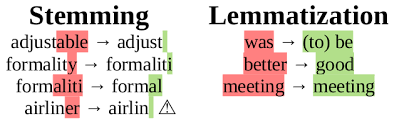](https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained#2.-EDA-%F0%9F%93%8A)


- Stemming biasanya mengacu pada proses yang sering kali memotong akhir kata dengan harapan mencapai tujuan dengan benar dan sering kali mencakup penghapusan imbuhan derivasional.

- Lemmatisasi biasanya mengacu pada melakukan sesuatu dengan benar menggunakan kosa kata dan analisis morfologi kata, biasanya bertujuan untuk menghilangkan akhiran infleksional saja dan mengembalikan bentuk dasar dan kamus dari sebuah kata

In [43]:
stemmer = nltk.SnowballStemmer("english")

# List all attributes and methods of the SnowballStemmer object
print(dir(stemmer))

# Get help/documentation for a specific method (for example, stem)
help(stemmer.stem)

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', 'languages', 'stem', 'stemmer', 'stopwords']
Help on method stem in module nltk.stem.snowball:

stem(word) method of nltk.stem.snowball.EnglishStemmer instance
    Stem an English word and return the stemmed form.
    
    :param word: The word that is stemmed.
    :type word: str or unicode
    :return: The stemmed form.
    :rtype: unicode



In [44]:
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [45]:
df_clean['cleaned_text'] = df_clean['cleaned_text'].apply(stemm_text)
df_clean.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created,No_of_Characters,No_of_Words,No_of_sentence,airline_sentiment_encodded,cleaned_text
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35,7,1,1,said
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72,13,1,2,plus youv ad commerci experi tacki
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71,16,1,1,didnt today must mean need take anoth trip
3,570301031407624196,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126,24,1,0,realli aggress blast obnoxi entertain guest fa...
4,570300817074462722,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55,12,1,0,realli big bad thing


## Wordcloud Visualize

In [46]:
def generate_wordcloud(text,Title):
    all_text = " ".join(text)
    wordcloud = WordCloud(width=800,
                          height=400,
                          stopwords=set(stop_words),
                          background_color='black').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

In [47]:
positive = df_clean[df_clean['airline_sentiment_encodded']==1]['cleaned_text'].tolist()

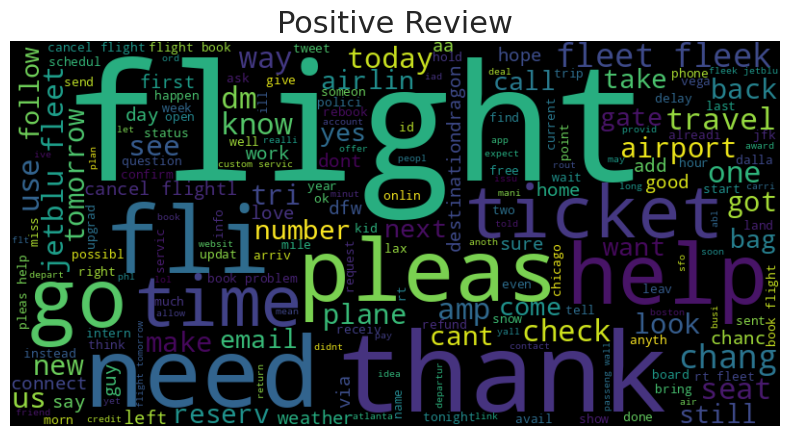

In [48]:
generate_wordcloud(positive,'Positive Review')

In [49]:
negative = df_clean[df_clean['airline_sentiment_encodded']==0]['cleaned_text'].tolist()

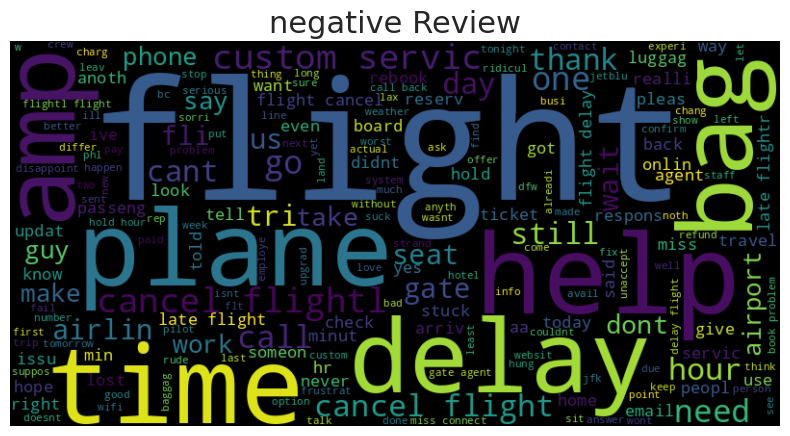

In [50]:
generate_wordcloud(negative,'negative Review')

In [51]:
natural = df_clean[df_clean['airline_sentiment_encodded']==2]['cleaned_text'].tolist()

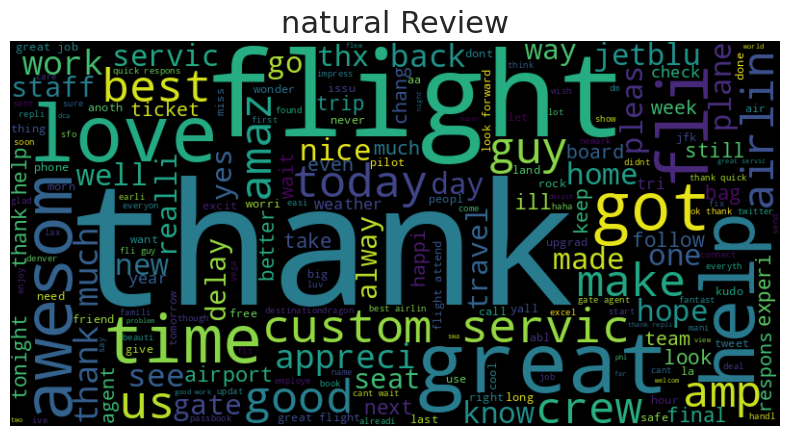

In [52]:
generate_wordcloud(natural,'natural Review')

## Final Result for the Corpus

In [53]:
def compare_text(before, after, show_before=True, show_after=True):
    if show_before:
        print("Before cleaning tags:")
        print(before)
        print("\n")

    if show_after:
        print("After cleaning tags:")
        print(after)
        print("\n")

In [54]:
# Mengambil teks dari baris 0 hingga 5
for i in range(2):
    after = clean_tags(df_clean['cleaned_text'].iloc[i])
    before = clean_tags(df_clean['text'].iloc[i])
    print("-"*10, f"Comparison for row {i}:", "-"*10)
    compare_text(before, after)

---------- Comparison for row 0: ----------
Before cleaning tags:
@VirginAmerica What @user said.


After cleaning tags:
said


---------- Comparison for row 1: ----------
Before cleaning tags:
@VirginAmerica plus you've added commercials to the experience... tacky.


After cleaning tags:
plus youv ad commerci experi tacki




# Vectorization

[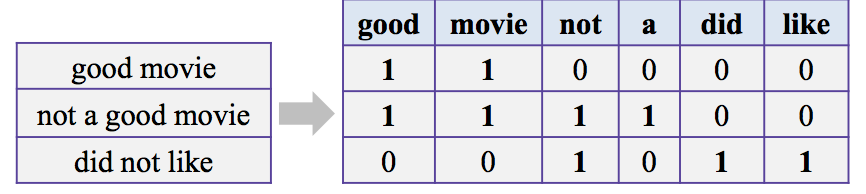](https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained#2.-EDA-%F0%9F%93%8A)

In [55]:
df_clean.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created,No_of_Characters,No_of_Words,No_of_sentence,airline_sentiment_encodded,cleaned_text
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35,7,1,1,said
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72,13,1,2,plus youv ad commerci experi tacki


In [56]:
# how to define X and y (from the tweets data) for use with COUNTVECTORIZER
x = df_clean['cleaned_text']
y = df_clean['airline_sentiment_encodded']

print(len(x), len(y))

14640 14640


In [57]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=70, shuffle=True)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

11712 11712
2928 2928


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [59]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

## Tunning CountVectorizer

1. `stop_words='english'`: Parameter ini mengindikasikan bahwa stopwords dalam bahasa Inggris akan diabaikan. Stopwords adalah kata-kata umum yang sering muncul dalam teks dan tidak memberikan banyak informasi tentang konten teks.

2. `ngram_range=(1,2)`: Parameter ini menentukan rentang n-gram yang akan digunakan. Dalam hal ini, n-gram yang digunakan adalah unigram (n=1) dan bigram (n=2). Unigram adalah sekumpulan satu kata, sedangkan bigram adalah sekumpulan dua kata yang bersebelahan.

3. `min_df=0.1`: Parameter ini menentukan jumlah minimum dokumen di mana suatu kata harus muncul agar diikutsertakan dalam vektor. Nilai 0.1 mengindikasikan bahwa kata-kata yang muncul di dalam setidaknya 10% dari semua dokumen akan diikutsertakan.

4. `max_df=0.7`: Parameter ini menentukan jumlah maksimum dokumen di mana suatu kata masih dianggap umum dan tidak dianggap sebagai fitur yang signifikan. Nilai 0.7 mengindikasikan bahwa kata-kata yang muncul di dalam lebih dari 70% dari semua dokumen akan diabaikan.

5. `max_features=100`: Parameter ini menentukan jumlah maksimum fitur yang akan digunakan. Dalam hal ini, hanya 100 fitur teratas yang akan dipilih berdasarkan frekuensinya.

Dengan pengaturan parameter-parameter ini, `CountVectorizer` akan menghasilkan representasi vektor dari teks yang telah diubah menjadi bag-of-words dengan fitur-fitur yang telah ditentukan. Fitur-fitur tersebut kemudian dapat digunakan sebagai input untuk model machine learning.

In [60]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

## TF-IDF (Term Frequency–Inverse Document Frequency)

TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode numerik dalam information retrieval untuk menentukan kepentingan sebuah kata dalam sebuah dokumen di dalam koleksi teks. Metode ini digunakan sebagai pembobotan kata dalam pencarian informasi, penambangan teks, dan pemodelan pengguna. Nilai TF-IDF meningkat seiring dengan frekuensi kata dalam dokumen tetapi dikompensasi oleh jumlah dokumen yang mengandung kata tersebut dalam korpus, mengakomodasi fakta bahwa beberapa kata muncul lebih sering secara umum. TF-IDF merupakan skema pembobotan kata yang populer, digunakan oleh 83% sistem rekomendasi berbasis teks di perpustakaan digital. Dengan menggunakan TF-IDF, kita dapat menemukan kata-kata yang paling penting dalam sebuah dokumen atau koleksi dokumen untuk berbagai tujuan seperti pencarian, analisis, dan pengelompokan teks.

[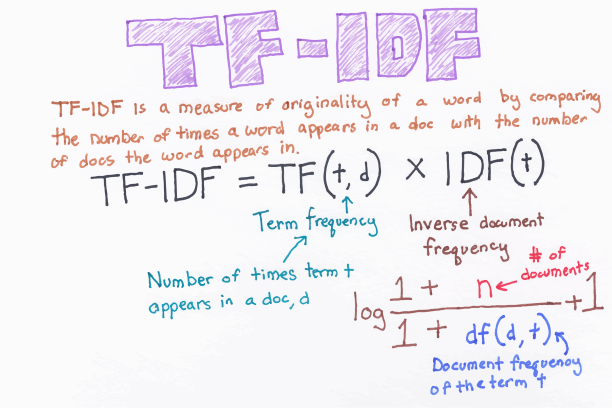](https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained#2.-EDA-%F0%9F%93%8A)


## (Bonus) TF-IDF Vectorize

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()

In [62]:
transformed_output = v.fit_transform(x_train)

In [63]:
print(v.vocabulary_)

{'ua': 7715, 'elit': 2309, 'gold': 3122, 'chase': 1230, 'pres': 5776, 'plus': 5663, 'credit': 1653, 'card': 1121, 'mani': 4490, 'eqm': 2396, 'need': 4919, 'platinum': 5628, 'companion': 1459, 'pass': 5444, 'aww': 544, 'guess': 3238, 'book': 850, 'flight': 2726, 'somewher': 6841, 'warm': 8081, 'asap': 425, 'suggest': 7111, 'man': 4482, 'sit': 6698, 'next': 4976, 'termin': 7314, 'scent': 6436, 'tht': 7440, 'cant': 1106, 'quit': 5936, 'put': 5907, 'finger': 2677, 'pls': 5657, 'dnt': 2104, 'let': 4221, 'status': 6980, 'stlaus': 7020, 'thank': 7338, 'oh': 5191, 'make': 4466, 'sens': 6523, 'bad': 568, 'americanview': 274, 'sweet': 7189, 'home': 3459, 'chicago': 1264, 'cost': 1590, 'day': 1799, 'vacat': 7932, 'got': 3149, 'rude': 6314, 'woman': 8305, 'tell': 7301, 'go': 3106, 'anoth': 331, 'countri': 1607, 'figur': 2660, 'pleas': 5637, 'plane': 5612, 'charg': 1217, 'much': 4838, 'move': 4814, 'full': 2965, 'earlier': 2242, 'seat': 6475, 'avail': 512, 'doesnt': 2112, 'didnt': 1991, 'say': 6413

In [64]:
print(x_train[:1])

1642    ua elit gold ua chase pres plus credit card  m...
Name: cleaned_text, dtype: object


In [65]:
transformed_output.toarray()[:1]

array([[0., 0., 0., ..., 0., 0., 0.]])

The scores printing below are the **IDF (Inverse Document Frequency)** values for each word in the vocabulary. IDF is a component of the TF-IDF (Term Frequency-Inverse Document Frequency) ***weighting scheme***.

In TF-IDF, the IDF value of a word ***measures the importance of the word in distinguishing documents***. ***Words with higher IDF values*** are those that ***are less common across documents*** but are more discriminative.

In [66]:
# dir(v)
all_feature_names = v.get_feature_names_out()
idf_score = []

for word in all_feature_names:
  indx = v.vocabulary_.get(word)
  idf_score.append(v.idf_[indx])

In [67]:
idf_dict = {"feature names":all_feature_names,
            "idf score":idf_score,}

In [68]:
df_idf = pd.DataFrame(idf_dict)

In [69]:
df_idf.sort_values(by="idf score", ascending = False)

,feature names,idf score
8500,zurichnew,9.675307
3376,helper,9.675307
3384,helpva,9.675307
3383,helpunitedsuck,9.675307
3381,helplin,9.675307
...,...,...
3371,help,3.688855
1095,cancel,3.641023
3523,hour,3.629118
7338,thank,3.183068


***Disini aku menggunakan 2 cara vektorisasi pada suatu konteks text vektorisasi.***

 1. Menggunakan langsung class yang disediakan oleh module "sklearn.feature_extraction.text" di dalam library "scikit-learn" named "TfidfVectorizer".

 2. Kita bisa lebih transparan dan flesibel untuk langkah pertama, jika kita pisahkan menjadi 2 step yaitu, CountVectorizer followed by TfidfTransformer. so the diff is just u seperated the step and u can perform any fine-tune for the parameters. but if u don't need that, just simple go for the first step.

In [70]:
tfidf_transformer = TfidfTransformer()

In [71]:
tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

In [72]:
x_train_tfidf

<11712x8501 sparse matrix of type '<class 'numpy.float64'>'
	with 95169 stored elements in Compressed Sparse Row format>

## Tokenization Here

In [73]:
texts = df_clean['cleaned_text']
target = df_clean['airline_sentiment_encodded']

In [74]:
## Tokenization Here ----- Tokenization Here ##

[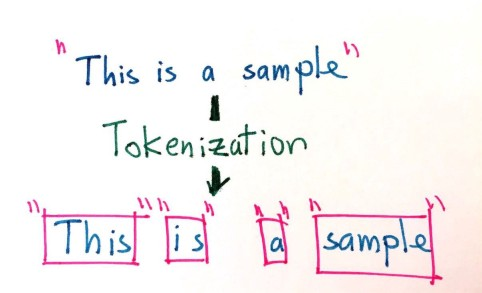](https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained#2.-EDA-%F0%9F%93%8A)


In [75]:
# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

In [76]:
vocab_length = len(word_tokenizer.word_index) + 1 # It's just beacuse indexing start from "zero"
vocab_length

9950

## Add padding with Pad_sequences

src = https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

tf.keras.utils.pad_sequences adalah sebuah fungsi yang disediakan oleh TensorFlow's Keras API untuk melakukan padding pada sekumpulan sekuen, seperti dalam konteks pemrosesan bahasa alami (NLP). Fungsi ini biasanya digunakan setelah tahap tokenisasi untuk memastikan bahwa semua sekuen memiliki panjang yang seragam.

Fungsi ini mengubah daftar (dengan panjang num_samples) urutan (daftar bilangan bulat) menjadi bentuk array Numpy 2D (num_samples, num_timesteps). num_timesteps bisa berupa argumen maxlen jika disediakan, atau panjang urutan terpanjang dalam daftar.

---

```python
>>> sequence = [[1], [2, 3], [4, 5, 6]]
>>> tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')
array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]], dtype=int32)
```

In [77]:
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

In [78]:
longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence))) # Sentence output
length_long_sentence = len(word_tokenize(longest_train)) # int len Output

# Find the index of the longest sentence in the texts Series
index_longest_sentence = texts.apply(lambda sentence: len(word_tokenize(sentence))).idxmax()

In [79]:
# texts[texts == longest_train]
print("Index of the longest sentence:", index_longest_sentence)

Index of the longest sentence: 2718


In [80]:
length_long_sentence # so each sequence will have the same length, namely equal to 80

21

In [81]:
display(embed(texts)[3]) # Before pad added
embed(texts)[index_longest_sentence] # The Maximum of length_long_sentence

[65, 2640, 1858, 3211, 645, 1574, 867, 18, 363, 2031]

[18,
 588,
 187,
 540,
 5402,
 453,
 833,
 76,
 310,
 416,
 63,
 341,
 240,
 163,
 75,
 361,
 405,
 19]

In [82]:
train_padded_sentences = pad_sequences(
    embed(texts),
    length_long_sentence,
    padding='post'
)

In [83]:
display(train_padded_sentences[3]) # Before pad added
train_padded_sentences[index_longest_sentence] # The Maximum of length_long_sentence

array([  65, 2640, 1858, 3211,  645, 1574,  867,   18,  363, 2031,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

array([  18,  588,  187,  540, 5402,  453,  833,   76,  310,  416,   63,
        341,  240,  163,   75,  361,  405,   19,    0,    0,    0],
      dtype=int32)

## Word Embeddings: GloVe (Global Vectors for Word Representation)


**GloVe** *(Vektor Global untuk Representasi Kata)* adalah algoritma pembelajaran tanpa pengawasan untuk penyematan kata. Ia mempelajari representasi vektor untuk kata-kata dengan memanfaatkan statistik kemunculan kata-kata secara global dalam sebuah korpus. Algoritme ini memfaktorkan matriks kemunculan bersama kata-kata untuk mendapatkan vektor kata padat. Vektor-vektor ini mengkodekan hubungan semantik antar kata, memungkinkan untuk menangkap persamaan dan analogi kata dalam ruang vektor berkelanjutan.

---

Here's an example of how **GloVe embeddings** can be used:

1. **Input**: Consider a corpus of text containing sentences such as "The cat sat on the mat" and "The dog barked loudly".

2. **Preprocessing**: Tokenize the sentences into individual words and count the co-occurrences of words within a fixed context window. For example, in the sentence "The cat sat on the mat", the word "cat" co-occurs with "the", "sat", "on", and "mat".

3. **Training**: Apply the GloVe algorithm to factorize the word-word co-occurrence matrix obtained from the preprocessing step. GloVe learns dense vector representations (*embeddings*) for each word based on their co-occurrence statistics.

4. **Output**: Obtain trained GloVe embeddings such as:
   - "cat": [0.2, 0.4, -0.1, ...]
   - "dog": [-0.3, 0.5, 0.2, ...]
   - "sat": [0.1, -0.3, 0.6, ...]

These embeddings capture semantic relationships between words, allowing for tasks like word similarity calculation, analogy detection, and improving the performance of downstream NLP tasks.

The file ***glove.6B.100d.txt*** is a pre-trained GloVe (Global Vectors for Word Representation) embedding file, I Get from Here : https://www.kaggle.com/datasets/mariapushkareva/glove-file/data

In [84]:
mainPath

'/content/drive/MyDrive/Colab Notebooks/1. BISA AI - [Studi Independen]/Natural Language Preprocessing/Final Project [Natural Languange Processing (NLP) dengan Deep Learning]'

In [85]:
embeddings_dictionary = dict()
embedding_dim = 100

In [86]:
# Load GloVe 100D embeddings
with open(mainPath + "/pre-trained GloVe embedding file/glove.6B.100d.txt") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

In [87]:
# embeddings_dictionary

In [88]:
# Now we will load embedding vectors of those words that appear in the
# Glove dictionary. Others will be initialized to 0.

embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1219    , -0.65645999,  0.50854999, ..., -0.23317   ,
        -0.013865  , -0.78455001],
       [-0.056244  ,  0.55971998,  0.4774    , ...,  0.2782    ,
        -0.68456   ,  0.53669   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Modeling

In [89]:
import plotly.figure_factory as ff

x_axes = ['positive', 'neutral', 'negative']
y_axes =  ['negative', 'neutral', 'positive']

def conf_matrix(z, x=x_axes, y=y_axes):

    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True

    return fig

## LSTM

## Split data

In [90]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences,
    target,
    test_size=0.2, random_state=70, shuffle=True
)

## Categorical tranform for Label (OneHotEncoding)

In [91]:
from keras.utils import to_categorical

# Ubah target menjadi one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

## Build The Model

In [92]:
from keras.layers import Embedding

def glove_lstm():
    model = Sequential()

    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        weights=[embedding_matrix],
        input_length=length_long_sentence
    ))

    model.add(Bidirectional(LSTM(
        length_long_sentence,
        return_sequences=True,
        recurrent_dropout=0.2
    )))

    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    return model

In [93]:
# Create the model instance
model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 100)           995000    
                                                                 
 bidirectional (Bidirection  (None, 21, 42)            20496     
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 42)                0         
 alMaxPooling1D)                                                 
                                                                 
 batch_normalization (Batch  (None, 42)                168       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 42)                0         
                                                        

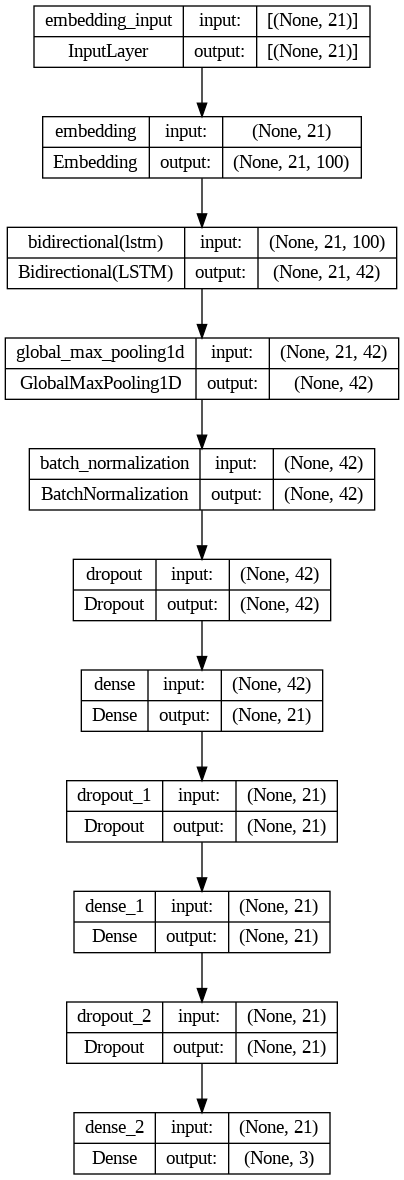

In [109]:
from tensorflow.keras.utils import plot_model

# Visualisasi arsitektur model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

## Fit The Model

In [94]:
from tensorflow.keras.callbacks import EarlyStopping,  ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'model.h5',
    monitor = 'val_categorical_accuracy',
    verbose = 1,
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_categorical_accuracy',
    factor = 0.2,
    verbose = 1,
    patience = 5,
    min_lr = 0.0001
)

# Tentukan kondisi EarlyStopping
early_stopping = EarlyStopping(
    monitor = 'val_categorical_accuracy',  # Monitor akurasi pada data validasi
    patience = 10,  # Toleransi untuk tidak ada peningkatan
    restore_best_weights = True,  # Kembalikan bobot terbaik ketika berhenti
    verbose = 1
)

In [95]:
import time
start_time = time.time() # Measure training time

history = model.fit(
    X_train,
    y_train_onehot,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test_onehot),
    verbose=1,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)
duration = time.time() - start_time
minutes = duration / 60
hours = duration / 3600

Epoch 1/100
91/92 [============================>.] - ETA: 0s - loss: 1.1921 - categorical_accuracy: 0.4824
Epoch 1: val_categorical_accuracy improved from -inf to 0.63217, saving model to model.h5
92/92 [==============================] - 15s 94ms/step - loss: 1.1901 - categorical_accuracy: 0.4836 - val_loss: 0.9572 - val_categorical_accuracy: 0.6322 - lr: 0.0010
Epoch 2/100
 2/92 [..............................] - ETA: 5s - loss: 0.9766 - categorical_accuracy: 0.6289

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



92/92 [==============================] - ETA: 0s - loss: 0.9212 - categorical_accuracy: 0.6074
Epoch 2: val_categorical_accuracy did not improve from 0.63217
92/92 [==============================] - 6s 67ms/step - loss: 0.9212 - categorical_accuracy: 0.6074 - val_loss: 0.9120 - val_categorical_accuracy: 0.6322 - lr: 0.0010
Epoch 3/100
91/92 [============================>.] - ETA: 0s - loss: 0.8488 - categorical_accuracy: 0.6357
Epoch 3: val_categorical_accuracy improved from 0.63217 to 0.63286, saving model to model.h5
92/92 [==============================] - 8s 90ms/step - loss: 0.8496 - categorical_accuracy: 0.6352 - val_loss: 0.8444 - val_categorical_accuracy: 0.6329 - lr: 0.0010
Epoch 4/100
92/92 [==============================] - ETA: 0s - loss: 0.7933 - categorical_accuracy: 0.6539
Epoch 4: val_categorical_accuracy improved from 0.63286 to 0.67896, saving model to model.h5
92/92 [==============================] - 6s 67ms/step - loss: 0.7933 - categorical_accuracy: 0.6539 - val_lo

In [96]:
print(f"--- Waktu training adalah {duration} detik ---")
print(f"--- Waktu training adalah {minutes} menit ---")
print(f"--- Waktu training adalah {hours} jam ---")

--- Waktu training adalah 222.83602666854858 detik ---
--- Waktu training adalah 3.7139337778091432 menit ---
--- Waktu training adalah 0.06189889629681905 jam ---


## Evaluation Model Performance

In [98]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('Epoch ',fontsize=16)
        ax[idx].set_ylabel('Acc or lost',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

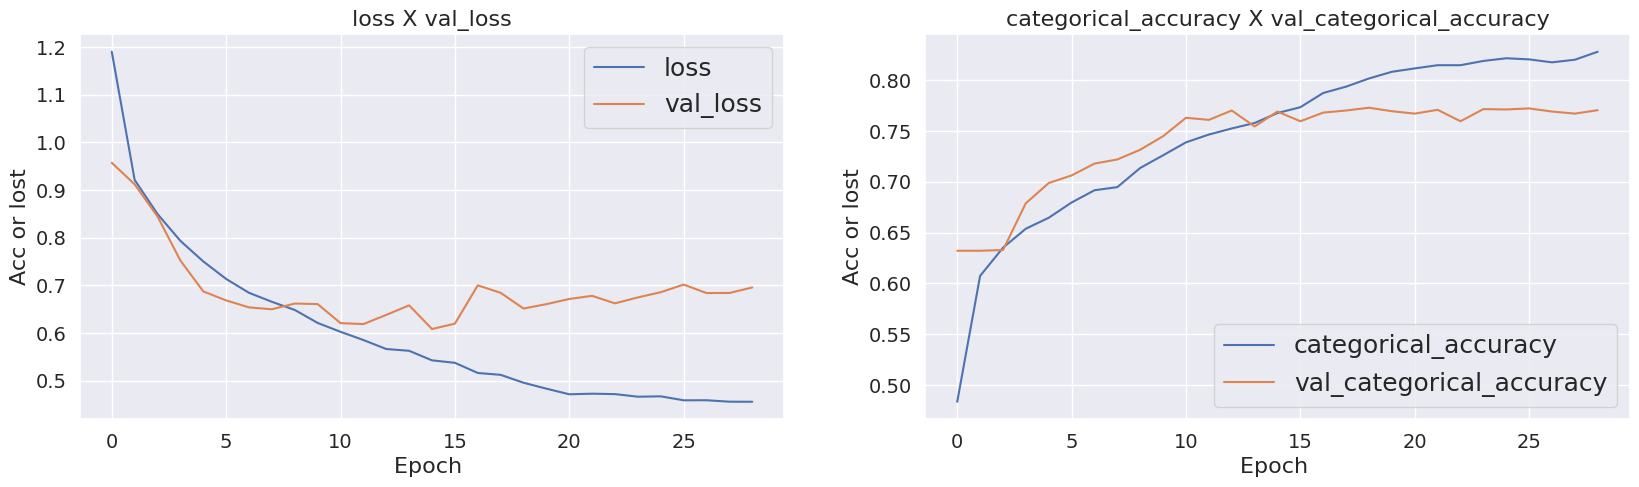

In [99]:
plot_learning_curves(history, [['loss', 'val_loss'],['categorical_accuracy', 'val_categorical_accuracy']])

In [106]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Lakukan prediksi menggunakan model
y_pred = np.argmax(model.predict(X_test), axis=-1)

92/92 [==============================] - 2s 19ms/step


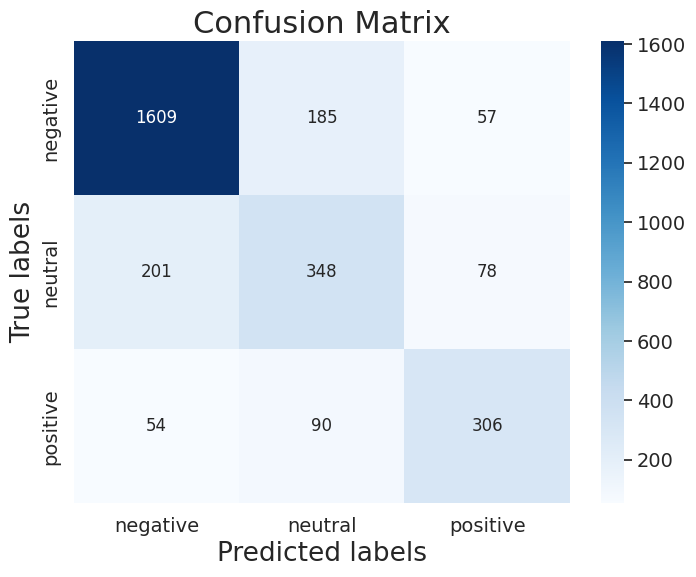

In [107]:
# Hitung confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_onehot, axis=1), y_pred)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung accuracy
accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), y_pred)

# Menghitung precision
precision = precision_score(np.argmax(y_test_onehot, axis=1), y_pred, average='weighted')

# Menghitung recall
recall = recall_score(np.argmax(y_test_onehot, axis=1), y_pred, average='weighted')

# Menghitung F1-score
f1 = f1_score(np.argmax(y_test_onehot, axis=1), y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7728825136612022
Precision: 0.7719459294246318
Recall: 0.7728825136612022
F1 Score: 0.7723955231774088
